# Install dependencies
Here we work with PM4Py. [It is the leading open source process mining platform written in Python.](https://https://pm4py.fit.fraunhofer.de/)

In [2]:
pip install pm4py

     |████████████████████████████████| 604kB 3.4MB/s 
     |████████████████████████████████| 40.6MB 90kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp36-cp36m-linux_x86_64.whl size=24373 sha256=89b5b9a5ebaa21e3498d802852f8b26997fbe6bf4b8f3cac78713903d0dc9493
  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
  Created wheel for ciso8601: filename=ciso8601-2.1.3-cp36-cp36m-linux_x86_64.whl size=28302 sha256=c9d3bee225c5f04a8da9519e8681f058a32c865c4498d031d592f52a3fcf9a8f
  Stored in directory: /root/.cache/pip/wheels/eb/32/e4/13bdaf7e245f82667b21e0cfb03d21224691a47fa9f9bc80a6
Successfully built stringdist ciso8601


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load the data

Here we work with a csv file. XES files can also be imported natively. XES is an an XML-based standard for event logs. [More info about it here ](http://www.xes-standard.org/_media/xes/xesstandarddefinition-2.0.pdf)

In [4]:
from pm4py.objects.log.importer.csv import factory as csv_importer
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.visualization.petrinet import factory as vis_factory
from pm4py.util import constants
from pm4py.objects.log.adapters.pandas import csv_import_adapter
from pm4py.objects.conversion.log import factory as conversion_factory

CASEID_GLUE = 'case_id' #the values for these parameteres must be assigned depending on the data
ACTIVITY_KEY = 'activity'
TIMEST_KEY = 'start'
parameters = {constants.PARAMETER_CONSTANT_CASEID_KEY: CASEID_GLUE,
              constants.PARAMETER_CONSTANT_ACTIVITY_KEY: ACTIVITY_KEY}

path_to_log = '/content/drive/My Drive/Student/VFU/s2/Process mining/logs/192.168.210.45.csv'

df = csv_import_adapter.import_dataframe_from_path(path_to_log, sep=',')
log = conversion_factory.apply(df, parameters)
log #log preview

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead


[{'attributes': {'concept:name': 1}, 'events': [{'case_id': 1, 'start': '01:24.8', 'end': '07:29.7', 'duration': '06:04.9', 'activity': 'private'}, '..', {'case_id': 1, 'start': '01:25.9', 'end': '01:52.2', 'duration': '00:26.3', 'activity': 'browsing'}]}, '....', {'attributes': {'concept:name': 15}, 'events': [{'case_id': 15, 'start': '49:04.7', 'end': '51:35.1', 'duration': '02:30.4', 'activity': 'copyFiles'}, '..', {'case_id': 15, 'start': '57:21.1', 'end': '57:46.2', 'duration': '00:25.2', 'activity': 'printing'}]}]

# Mining the log

## Alpha miner - Petri net

The Alpha Algorithm is one of the most known Process Discovery algorithm and is able to find:

- A Petri net model where all the transitions are visible and unique and correspond to classified events (for example, to activities).
- An initial marking that describes the status of the Petri net model when a execution starts
- A final marking that describes the status of the Petri net model when a execution ends

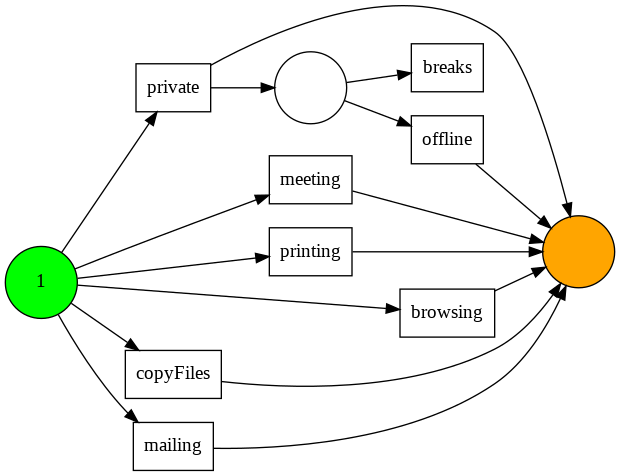

In [ ]:
from pm4py.algo.discovery.alpha import factory as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log, parameters)
gviz = vis_factory.apply(net, initial_marking, final_marking)
vis_factory.view(gviz)

## Inductive miner - process tree

The inductive miner always gurantees sound process models. The process tree visualization then clearly depicts branches (splits) of the process flow and the detects the relevant operator.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply_tree is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  


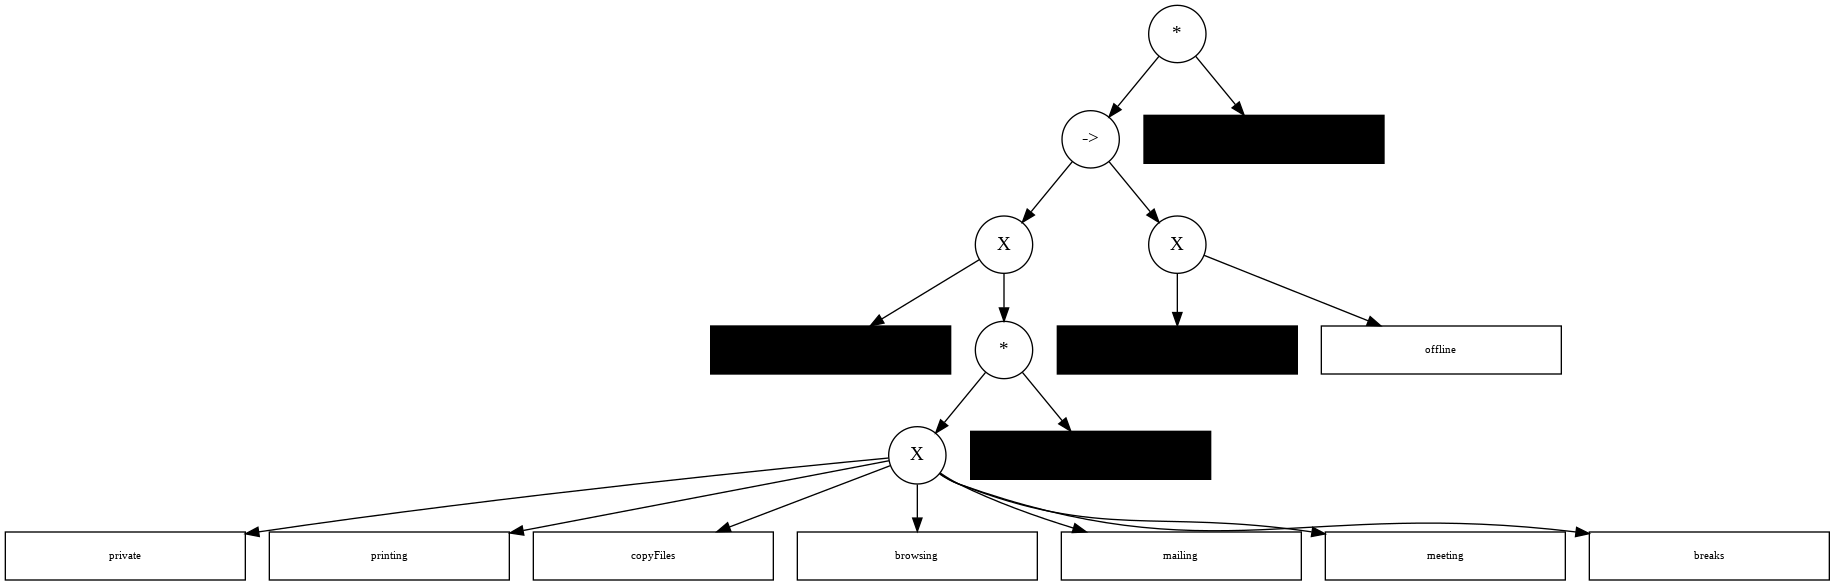

In [5]:
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

tree = inductive_miner.apply_tree(log, parameters)
gviz = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz)

sign | meaning
--- | ---
-> | sequential composition
X | exclusive choice (OR)
+ | parallel composition
* | redo loop

In [6]:
print(tree) #the process tree can be exported to text definition. 

*( ->( X( *( X( 'private', 'meeting', 'browsing', 'printing', 'mailing', 'copyFiles', 'breaks' ), τ ), τ ), X( 'offline', τ ) ), τ )


## Heuristics Miner - heuristics net

Heuristics Miner is an algorithm that acts on the Directly-Follows Graph, providing way to handle with noise and to find common constructs (dependency between two activities, AND). The output of the Heuristics Miner is an Heuristics Net, so an object that contains the activities and the relationships between them. The Heuristics Net can be then converted into a Petri net.

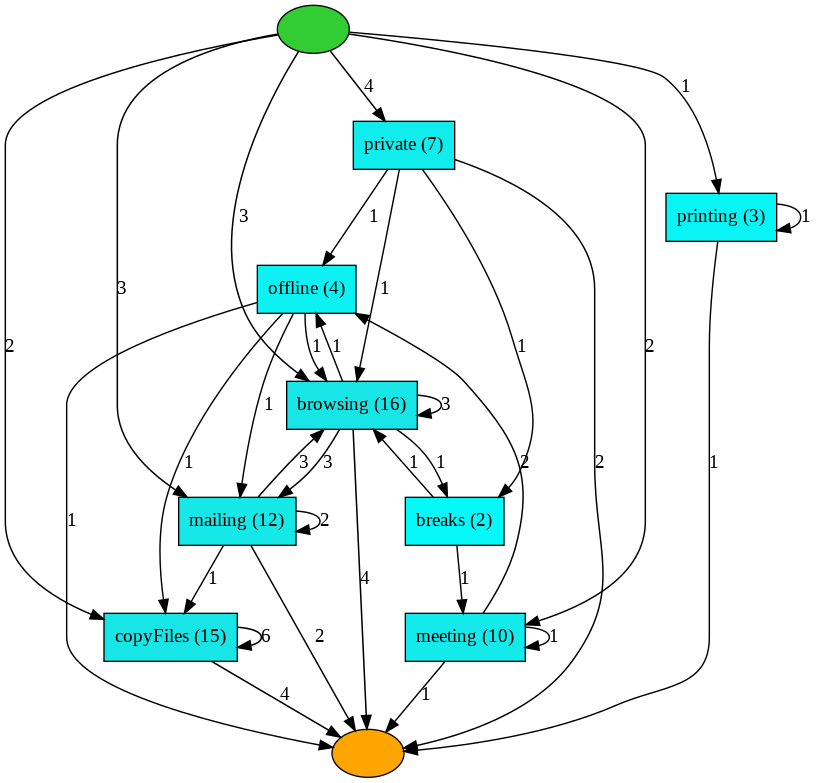

In [ ]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.visualization.heuristics_net import factory as hn_vis_factory

heu_net = heuristics_miner.apply_heu(log, parameters)
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

## Heuristics miner - petri net



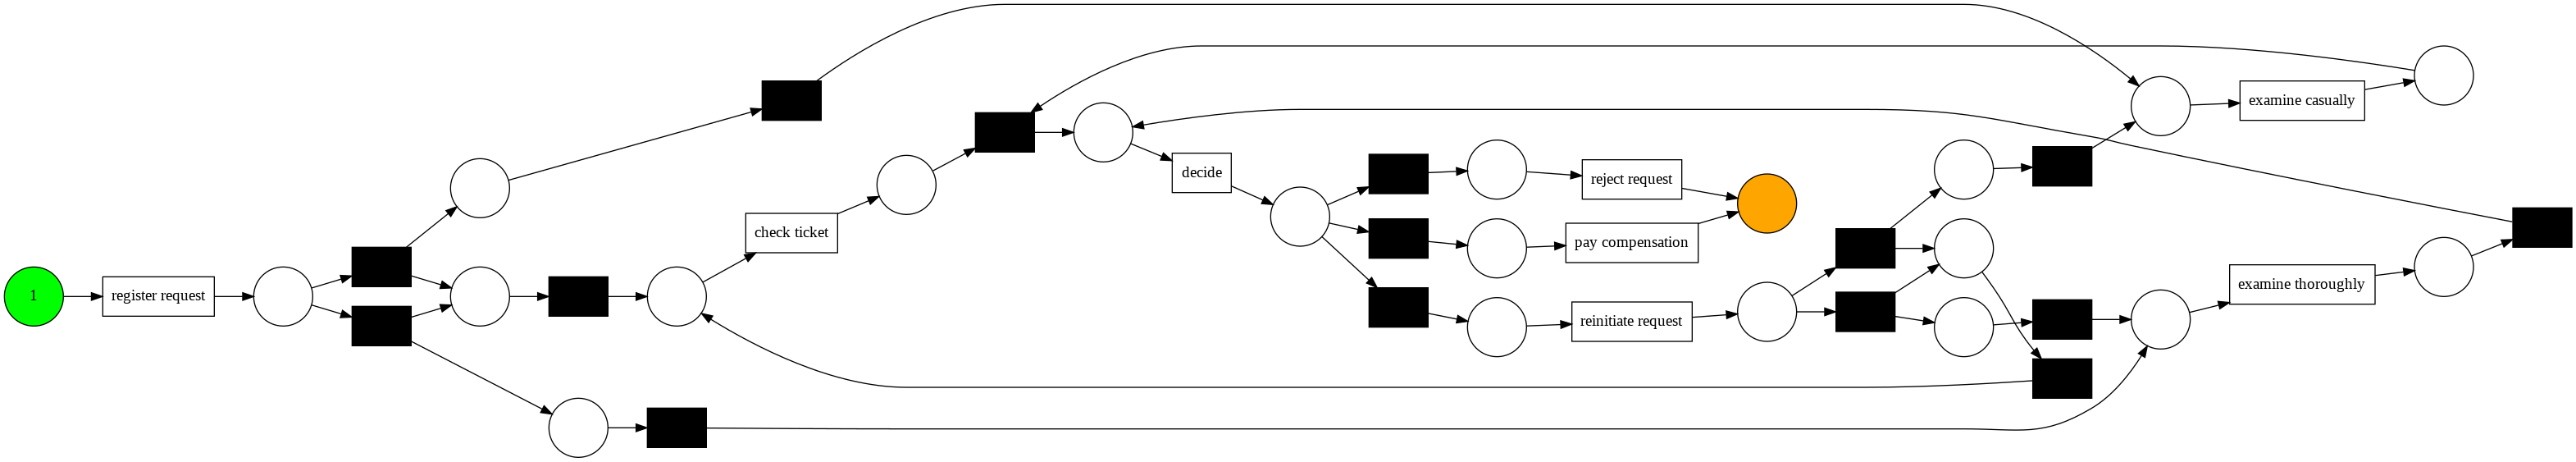

In [ ]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

net, im, fm = heuristics_miner.apply(log, parametersq)
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

### with frequency/performance

This is a more detailed version of the heuristics net, showing every process activity and the frequency with which it happened. 

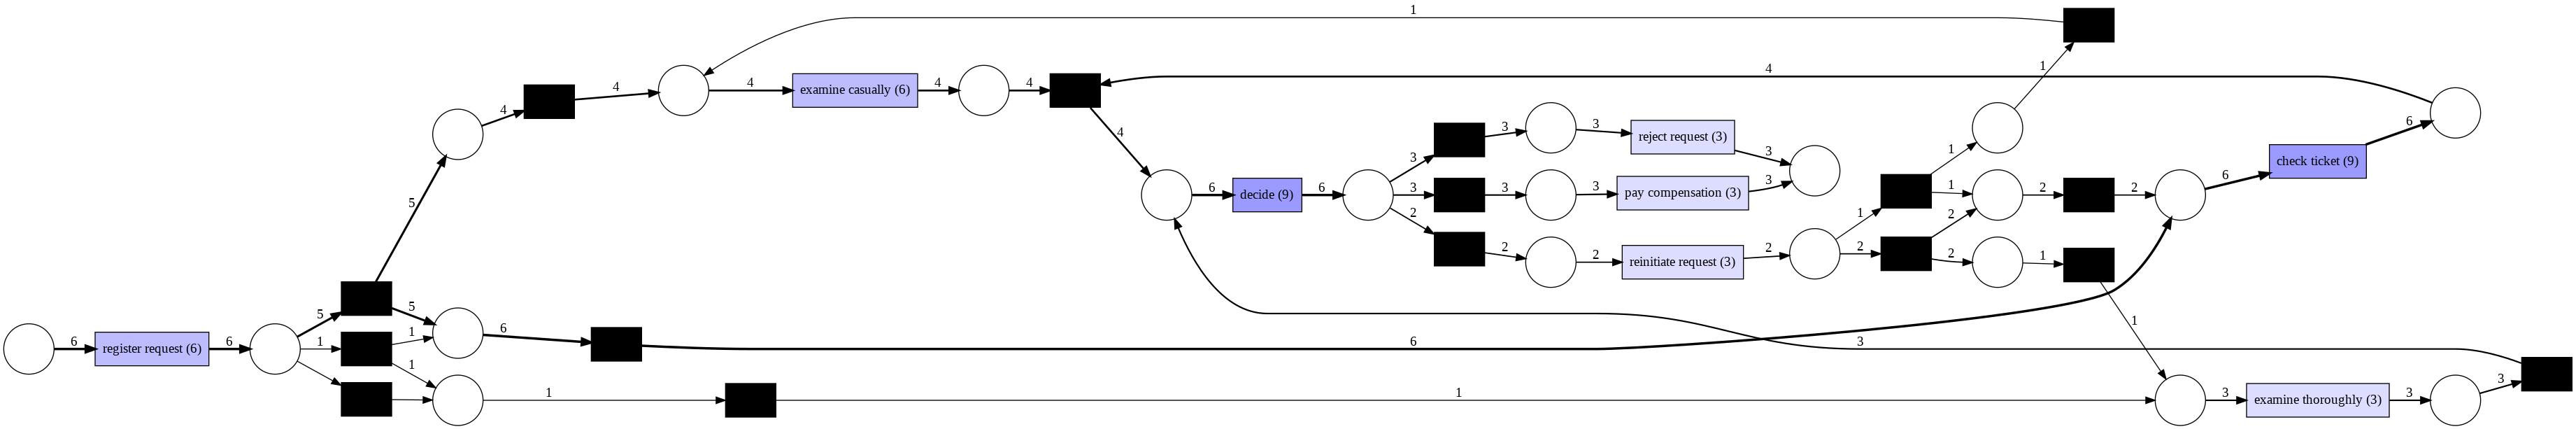

In [ ]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

net, im, fm = heuristics_miner.apply(log, parameters)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking, parameters=parameters, variant="frequency", log=log)
pn_vis_factory.view(gviz)

pn_vis_factory.save(gviz, "inductive_frequency.png")


## Trace clustering

Clustering is an important functionality that splits the traces of the log into groups having similar behavior.

The algorithm that has been implemented in PM4Py is basilar:

- An one-hot encoding of the activities of the single events is obtained.
- A PCA is performed to reduce the number of components that are considered by the clustering algorithm.
- The DBSCAN clustering algorithm is applied in order to split the traces into groups

In [ ]:
#tbd

## Social network analysis

Only when a resource feature is present. The current dataset does not contain such a feature. 

In [33]:
from pm4py.algo.enhancement.sna import factory as sna_factory
from pm4py.visualization.sna import factory as sna_vis_factory
from pyvis import network as net
import networkx as nx

#hw_values = sna_factory.apply(log, variant="handover")
#gviz_hw_py = sna_vis_factory.apply(hw_values, variant="pyvis")
#sna_vis_factory.view(gviz_hw_py, variant="pyvis")